In [2]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from IPython import display
display.set_matplotlib_formats('svg')

In [4]:
nPerClust = 100

def create_data(nPerClust = 100):

    blur = 1

    #     x, y
    A = [ 1, 3 ] # centroid category 1
    B = [ 1, -2] # centroid category 2

    a = [ A[0]+np.random.randn(nPerClust)*blur, A[1]+np.random.randn(nPerClust)*blur ]
    b = [ B[0]+np.random.randn(nPerClust)*blur, B[1]+np.random.randn(nPerClust)*blur ]

    labels_np = np.vstack((np.zeros((nPerClust,1)), np.ones((nPerClust,1))))

    data_np = np.hstack((a, b)).T

    data = torch.tensor(data_np).float()
    labels = torch.tensor(labels_np).float()

    return data, labels


In [5]:
data, labels = create_data()

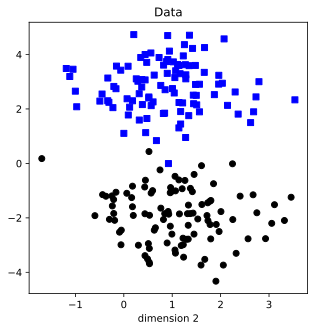

In [6]:
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0], 0], data[np.where(labels==0)[0], 1], 'bs')
plt.plot(data[np.where(labels==1)[0], 0], data[np.where(labels==1)[0], 1], 'ko')
plt.title('Data')
plt.xlabel('dimension 1')
plt.xlabel('dimension 2')
plt.show()

In [6]:
numepochs = 1000

def classifier(learningRate, numepochs):
    ANNclassify = nn.Sequential(
        nn.Linear(2, 16), # input layer
        nn.ReLU(),
        nn.Linear(16, 1), # hidden layer
        nn.ReLU(),
        nn.Linear(1, 1),  # output layer
        nn.Sigmoid()
    )
    
    lossFun = nn.BCELoss()
    # Note : it is recommend to use BCEWithLogitsLoss function without explicitly adding the Sigmoid to the model
    # BCEWithLogitsLoss internally use Sigmoid and this is more stable
    optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=learningRate)

    losses = torch.zeros(numepochs)

    for epochi in range(numepochs):

        yhat = ANNclassify(data) # forward pass

        loss = lossFun(yhat, labels) # compute the loss
        losses[epochi] = loss

        # backprop
        optimizer.zero_grad() # initialize gradients to zeros
        loss.backward()
        optimizer.step()
    
    predictions = ANNclassify(data)

    predlabels = predictions > 0.5

    # find errors
    misclassified = np.where(predlabels != labels)[0]

    totalacc = 100 - (100 * len(misclassified)/(2*nPerClust))

    return totalacc, losses
    

In [7]:
learning_rate = np.linspace(0.001, 0.2, 40)

allLosses = np.zeros((learning_rate.shape[0], numepochs))
allAcc = np.zeros(learning_rate.shape[0])

In [ ]:
for i, lr in enumerate(learning_rate):

    totalacc, losses = classifier(lr, numepochs)
    allLosses[i, :] = losses.detach()
    allAcc[i] = totalacc
    print(i)


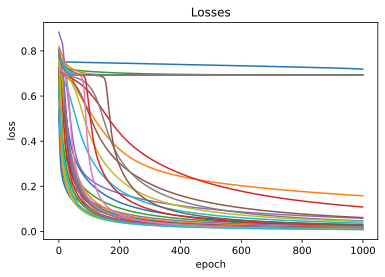

In [9]:
for i in range(learning_rate.shape[0]):

    plt.plot(allLosses[i,:])

plt.title('Losses')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

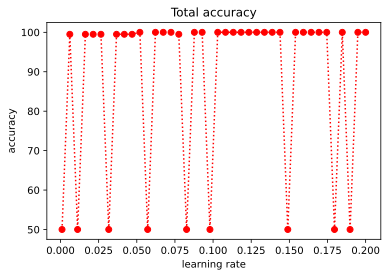

In [10]:
plt.plot(learning_rate,allAcc, 'ro:')
plt.title('Total accuracy')
plt.ylabel('accuracy')
plt.xlabel('learning rate')
plt.show()

In [11]:
float(sum(allAcc > 70)/allAcc.shape)

0.775

In [12]:
allAcc

array([ 50. ,  99.5,  50. ,  99.5,  99.5,  99.5,  50. ,  99.5,  99.5,
        99.5, 100. ,  50. , 100. , 100. , 100. ,  99.5,  50. , 100. ,
       100. ,  50. , 100. , 100. , 100. , 100. , 100. , 100. , 100. ,
       100. , 100. ,  50. , 100. , 100. , 100. , 100. , 100. ,  50. ,
       100. ,  50. , 100. , 100. ])

# With Sigmoid

In [72]:
def classifier(learningRate, numepochs):
    ANNclassify = nn.Sequential(
        nn.Linear(2, 16), # input layer
        nn.ReLU(),
        nn.Linear(16, 1), # hidden layer
        nn.ReLU(),
        nn.Linear(1, 1),  # output layer
        nn.Sigmoid()
    )
    
    lossFun = nn.BCELoss()
    # Note : it is recommend to use BCEWithLogitsLoss function without explicitly adding the Sigmoid to the model
    # BCEWithLogitsLoss internally use Sigmoid and this is more stable
    optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=learningRate)

    losses = torch.zeros(numepochs)

    for epochi in range(numepochs):

        yhat = ANNclassify(data) # forward pass

        loss = lossFun(yhat, labels) # compute the loss
        losses[epochi] = loss

        # backprop
        optimizer.zero_grad() # initialize gradients to zeros
        loss.backward()
        optimizer.step()
    
    predictions = ANNclassify(data)

    predlabels = predictions > 0.5

    # find errors
    misclassified = np.where(predlabels != labels)[0]

    totalacc = 100 - (100 * len(misclassified)/(2*nPerClust))

    return totalacc, losses, predictions
    

In [73]:
totalacc, losses, predictions = classifier(0.1, 1000)

In [74]:
totalacc

99.5

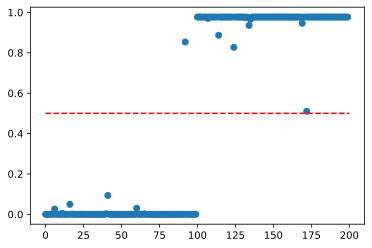

In [75]:
plt.plot(predictions.detach(), 'o')
plt.plot([0, 200], [0.5, 0.5], 'r--')
plt.show()

In [77]:
100*(torch.mean(((predictions > 0.5) == labels).float())).item()

99.50000047683716

# With BCEWithLogitsLoss

In [39]:
def classifier(learningRate, numepochs):
    ANNclassify = nn.Sequential(
        nn.Linear(2, 16), # input layer
        nn.ReLU(),
        nn.Linear(16, 1), # hidden layer
        nn.ReLU(),
        nn.Linear(1, 1),  # output layer
    )
    
    lossFun = nn.BCEWithLogitsLoss()
    # Note : it is recommend to use BCEWithLogitsLoss function without explicitly adding the Sigmoid to the model
    # BCEWithLogitsLoss internally use Sigmoid and this is more stable
    optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=learningRate)

    losses = torch.zeros(numepochs)

    for epochi in range(numepochs):

        yhat = ANNclassify(data) # forward pass

        loss = lossFun(yhat, labels) # compute the loss
        losses[epochi] = loss

        # backprop
        optimizer.zero_grad() # initialize gradients to zeros
        loss.backward()
        optimizer.step()
    
    predictions = ANNclassify(data)

    predlabels = predictions > 0.5

    # find errors
    misclassified = np.where(predlabels != labels)[0]

    totalacc = 100 - (100 * len(misclassified)/(2*nPerClust))

    return totalacc, losses, predictions
    

In [48]:
totalacc, losses, predictions = classifier(0.1, 1000)

In [49]:
totalacc

99.0

In [71]:
100*(torch.mean(((predictions > 0) == labels).float())).item()

99.00000095367432

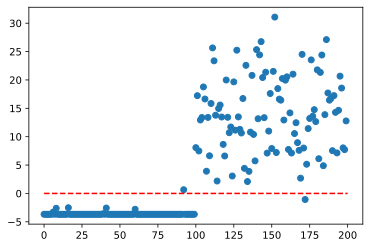

In [50]:
plt.plot(predictions.detach(), 'o')
plt.plot([0, 200], [0, 0], 'r--')
plt.show()